In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Dataset/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
r = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 89s 6s/step - loss: 0.6689 - accuracy: 0.6445 - val_loss: 0.6578 - val_accuracy: 0.5950
Epoch 2/10
14/14 [==============================] - 40s 3s/step - loss: 0.6210 - accuracy: 0.6445 - val_loss: 0.5821 - val_accuracy: 0.5950
Epoch 3/10
14/14 [==============================] - 40s 3s/step - loss: 0.5583 - accuracy: 0.6445 - val_loss: 0.5477 - val_accuracy: 0.5950
Epoch 4/10
14/14 [==============================] - 40s 3s/step - loss: 0.5172 - accuracy: 0.6445 - val_loss: 0.5294 - val_accuracy: 0.5950
Epoch 5/10
14/14 [==============================] - 38s 3s/step - loss: 0.5292 - accuracy: 0.6445 - val_loss: 0.5148 - val_accuracy: 0.5950
Epoch 6/10
14/14 [==============================] - 41s 3s/step - loss: 0.4795 - accuracy: 0.6445 - val_loss: 0.4566 - val_accuracy: 0.5950
Epoch 7/10
14/14 [==============================] - 42s 3s/step - loss: 0.4416 - accuracy: 0.6445 - val_loss: 0.4153 - val_accuracy: 0.5950
Epoch 8/10
14/14 [==

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
print(len(predictions))

121


In [ ]:
model.save("forest1.h5")

In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [ ]:
model = load_model("forest1.h5")

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 108ms/step
[[0.36043727]]


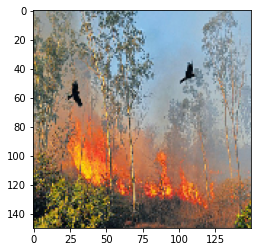

In [ ]:
predictImage("/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/599857.jpg")

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [ ]:
#load the saved model
model = load_model(r'forest1.h5')
#define video
video = cv2.VideoCapture('/content/MyDrive/Dataset/Pexels Videos 2715412.mp4')
#define the features
name = ['forest','with forest']

In [ ]:
account_sid = 'ACd7317b90ea7039294a4e834a2731cb4a'
auth_token = '84b9f0b1f502b6ebbcbeac93b3bfad8a'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+13465224352',
         to='+916383040400'
     
     )

print(message.sid)

SM5c8279f88231f3565ba26ee4daf7804f


In [ ]:
#import opencv library
import cv2
#import numpy
import numpy as np
#import images and load_model function from keras
from keras_preprocessing import image
from keras.models import load_model
#import client from twilio API
from  twilio.rest import Client
#import playsound package
from playsound import playsound

#load the saved model
model = load_model(r'forest1.h5')
video = cv2.VideoCapture('/content/MyDrive/Dataset/pexels-arnav-kainthola-7543653.mp4')
name = ['forest','with fire']